<a href="https://colab.research.google.com/github/millicentochieng/POJECT2/blob/main/Copy_of_mycopy_housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google import colab
colab.drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os 

path = '/content/gdrive/My Drive/Colab/' # specify your directory where you want to create a folder for storing data.
os.chdir(path) # change directory.

new_folder_name='prices' # create a folder for storing data.

if not os.path.exists(new_folder_name): # create a folder for storing data if it does not exist.
    os.mkdir(new_folder_name) # make a directory

os.chdir(path + '/' + new_folder_name) # change directory

print("Current directory:", os.getcwd())

Current directory: /content/gdrive/My Drive/Colab/prices


In [ ]:
from google.colab import files
files.upload() # upload kaggle.json

Saving kaggle.json to kaggle (10).json


{'kaggle.json': b'{"username":"millicentochieng","key":"323ede7ae172f1f6fac1972e315a96c8"}'}

In [ ]:
!pip install kaggle
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [ ]:
!kaggle datasets download camnugent/california-housing-prices

401 - Unauthorized


In [ ]:
import glob
import zipfile
zipfiles = glob.glob(os.getcwd() + '/*.zip')
zipfiles


local_zip =zipfiles[0] # specify where train.zip is
zip_ref = zipfile.ZipFile(local_zip, 'r')  # create a ZipFile object
zip_ref.extractall() # create a folder in the current directory and get all data
zip_ref.close() # close

In [ ]:
!ls '/content/gdrive/My Drive/colab/prices'
base_folder = '/content/gdrive/My Drive/Colab/prices'

california-housing-prices.zip  housing.csv  kaggle.json


In [ ]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(base_folder+'/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Exploring the data**

In [ ]:
#Checking for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


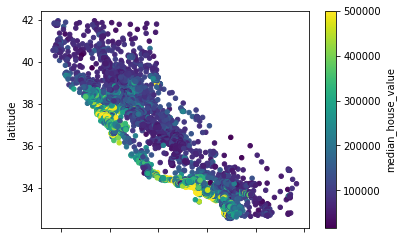

In [ ]:
# plot the houses' location
ax1 = df.plot.scatter(x='longitude',y='latitude',c = 'median_house_value',colormap='viridis')

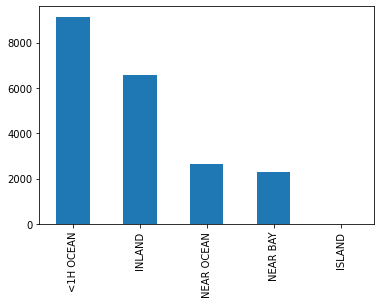

In [ ]:
# plot ocean proximity
df.ocean_proximity.value_counts().plot(kind = 'bar')

In [ ]:
# Various categories of Ocean Proximity
df.ocean_proximity.unique()

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])


In [ ]:
#One hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [ ]:
#Exercise- Explore the other variables by plotting them
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [ ]:
#looking at correlation of the different variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [ ]:
#Dropping total  bedrooms and population because they explain the same information as total rooms and households respectively
df2 = df.drop(['total_bedrooms','population'],axis = 1)

In [ ]:
# #rescalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
col = df.columns
df2 = scaler.transform(df)
df = pd.DataFrame(df2, columns=col)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.0,1.0,0.0,0.0,0.0


The median house values are continuous and hence it is a regression problem

In [ ]:
#split data into training and testing data
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
X= X.fillna(X.mean())
y = df['median_house_value']


original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(original_Xtrain, original_ytrain)
pred = clf.predict(original_Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

r2_score(original_ytest.to_numpy(), pred)

0.6257351821159707

In [ ]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(original_ytest.to_numpy(), pred)))

0.14439408480698354


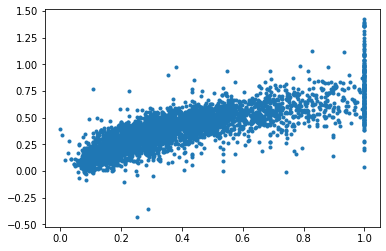

In [ ]:
plt.plot(original_ytest, pred, '.')

# LINEAR REGRESSION

In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(original_Xtrain, original_ytrain)
#print the intercept and coefficients 
# print("Intercept is "+str(linearRegModel.intercept_))
# print("coefficients  is "+str(linearRegModel.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
#predict on the test data
y_pred = linearRegModel.predict(original_Xtest)

In [ ]:
# print(len(y_pred))
# print(len(original_ytest)
# print(y_pred[0:5])
# print(original_ytest[0:5])

In [ ]:
# test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
# fig= plt.figure(figsize=(16,8))
# test = test.reset_index()
# test = test.drop(['index'],axis=1)
# plt.plot(test[:50])
# plt.legend(['Actual','Predicted'])
# sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
# R-Square
r2_score(original_ytest.to_numpy(), y_pred)

0.6257351821159707

In [ ]:
#RMSE
print(np.sqrt(mean_squared_error(original_ytest.to_numpy(),y_pred)))
print(np.sqrt(mean_squared_error(original_ytrain,linearRegModel.predict(original_Xtrain))))


0.14439408480698354
0.1411003199299431


# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(original_Xtrain, original_ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dtReg_y_pred = dtReg.predict(original_Xtest)
dtReg_y_pred

array([0.08833188, 0.11068889, 0.8554078 , ..., 0.99801651, 0.12950527,
       0.41897946])

In [ ]:
# print(len(dtReg_y_pred))
# print(len(original_ytest)
# print(dtReg_y_pred[0:5])
# print(original_ytest[0:5])

In [ ]:
# R-Square
r2_score(original_ytest.to_numpy(), dtReg_y_pred)

0.7101426754850687

In [ ]:

#RMSE

print(np.sqrt(mean_squared_error(original_ytest.to_numpy(),dtReg_y_pred)))
print(np.sqrt(mean_squared_error(original_ytrain,dtReg.predict(original_Xtrain))))


0.12707263630734741
0.10846830910056257


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor(30)
rfReg.fit(original_Xtrain, original_ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfReg_y_pred = rfReg.predict(original_Xtest)
rfReg_y_pred


array([0.07700633, 0.12693567, 0.91724281, ..., 0.9999984 , 0.11007034,
       0.32136843])

In [ ]:
# print(len(rfReg_y_pred))
# print(len(original_ytest)
# print(rfReg_y_pred[0:5])
# print(original_ytest[0:5])

In [ ]:
# R-Square
r2_score(original_ytest.to_numpy(), rfReg_y_pred)

0.810794242325245

In [ ]:
#RMSE

print(np.sqrt(mean_squared_error(original_ytest.to_numpy(),rfReg_y_pred)))
print(np.sqrt(mean_squared_error(original_ytrain,rfReg.predict(original_Xtrain))))

0.10266610233657172
0.03981082601676534


In [ ]:
#REGULATE

rfReg = RandomForestRegressor(30,max_depth=200,random_state=0)
rfReg.fit(original_Xtrain, original_ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rfReg_y_pred = rfReg.predict(original_Xtest)
rfReg_y_pred

array([0.08596803, 0.11075533, 0.91787538, ..., 0.99243811, 0.11200646,
       0.30300425])

In [ ]:
# R2

r2_score(original_ytest.to_numpy(), rfReg_y_pred)

0.8117608218427663

In [ ]:
#RMSE

print(np.sqrt(mean_squared_error(original_ytest.to_numpy(),rfReg_y_pred)))
print(np.sqrt(mean_squared_error(original_ytrain,rfReg.predict(original_Xtrain))))

0.102403525721676
0.03961598457571588
